<a href="https://colab.research.google.com/github/MrCamilo5/ML-aprender-3/blob/master/TALLERESTADISTICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller Estadística y Probabilidad
Instrucciones: Obtenga de Yahoo! Finanzas los datos históricos para las series de tiempo de precios de cierre diarios para 3 títulos accionarios cotizantes en cualquier sector y bolsa del mundo y responda a las siguientes preguntas empleando únicamente los datos diarios observados durante los meses de octubre 2019 a enero 2020. Se recomienda usar software computacional o estadístico de su preferencia. Menciona en el siguiente cuadro el nombre y la serie de los títulos elegidos:  
> Título | Emisora/serie 
> ---|---
>1|AMD 
>2|Apple Inc
>3|Amazon.com, Inc.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pandas_datareader import data

In [0]:
#IMPORTAMOS LOS DATOS DE YAHOO DEL VALOR DE LAS ACCIONES DE LAS TRES COMPAÑIAS
amd=data.DataReader('AMD',start='2019-10-1', end='2020-01-31', data_source='yahoo')
apple=data.DataReader('AAPL',start='2019-10-1', end='2020-01-31', data_source='yahoo')
amazon=data.DataReader('AMZN',start='2019-10-1', end='2020-01-31', data_source='yahoo')

In [0]:
#DATASET DE AMAZON
amazon

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-01,1755.599976,1728.410034,1746.000000,1735.650024,3084500,1735.650024
2019-10-02,1728.890015,1705.000000,1727.739990,1713.229980,3301100,1713.229980
2019-10-03,1725.000000,1685.060059,1713.000000,1724.420044,3468200,1724.420044
2019-10-04,1740.579956,1719.229980,1726.020020,1739.650024,2471900,1739.650024
2019-10-07,1747.829956,1723.699951,1731.630005,1732.660034,2154700,1732.660034
...,...,...,...,...,...,...
2020-01-27,1841.000000,1815.339966,1820.000000,1828.339966,3528500,1828.339966
2020-01-28,1858.109985,1830.020020,1840.500000,1853.250000,2808000,1853.250000
2020-01-29,1874.750000,1855.020020,1864.000000,1858.000000,2088000,1858.000000


In [0]:
#DATASET DE Apple INC
apple

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-01,228.220001,224.199997,225.070007,224.589996,34805800.0,223.387573
2019-10-02,223.580002,217.929993,223.059998,218.960007,34612300.0,217.787720
2019-10-03,220.960007,215.130005,218.429993,220.820007,28606500.0,219.637756
2019-10-04,227.490005,223.889999,225.639999,227.009995,34619700.0,225.794617
2019-10-07,229.929993,225.839996,226.270004,227.059998,30576500.0,225.844345
...,...,...,...,...,...,...
2020-01-27,311.769989,304.880005,310.059998,308.950012,40485000.0,308.218506
2020-01-28,318.399994,312.190002,312.600006,317.690002,40558500.0,316.937805
2020-01-29,327.850006,321.380005,324.450012,324.339996,54057300.0,323.572052


In [0]:
#DATASET DE AMD
amd

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-01,29.540001,28.639999,29.049999,28.760000,37081800,28.760000
2019-10-02,28.850000,28.030001,28.500000,28.309999,43640700,28.309999
2019-10-03,28.780001,27.430000,28.280001,28.680000,56325200,28.680000
2019-10-04,29.059999,28.280001,28.830000,29.010000,34446700,29.010000
2019-10-07,29.629999,28.840000,28.900000,28.930000,39337200,28.930000
...,...,...,...,...,...,...
2020-01-27,49.790001,47.900002,48.450001,49.259998,48878600,49.259998
2020-01-28,50.849998,49.480000,50.029999,50.529999,62343800,50.529999
2020-01-29,48.070000,46.099998,47.840000,47.509998,112349900,47.509998


1.- Elabore las gráficas de evolución de precios y rendimientos continuos en el tiempo. Comente sobre la inspección visual de dichas gráficas.


In [0]:
"""
Rendimientos continuos en el tiempo: 

"""
amd_values= amd.iloc[:,3]
apple_values= apple.iloc[:,3]
amazon_values=amazon.iloc[:,3]
def rendimiento(a,b,c):
  aa, bb, cc = np.zeros(int(a.shape[0]-1)),np.zeros(int(b.shape[0]-1)),np.zeros(int(c.shape[0]-1))
  for _ in range(a.shape[0]-1):
    aa[_]= np.log(a[_+1]/a[_])
    bb[_]= np.log(b[_+1]/b[_])
    cc[_]= np.log(c[_+1]/c[_])
  datos=pd.DataFrame({'AMD': aa, 'Apple': bb, 'Amazon': cc})
  return datos

In [0]:
"""
Calcular el vaor de los rendimientos: 
"""

rendimiento_de_acciones=rendimiento(amd_values, apple_values, amazon_values)
print(rendimiento_de_acciones)

         AMD     Apple    Amazon
0  -0.015770 -0.025387 -0.013002
1   0.012985  0.008459  0.006510
2   0.011441  0.027646  0.008793
3  -0.002761  0.000220 -0.004026
4  -0.024494 -0.011784 -0.015794
..       ...       ...       ...
79 -0.021886 -0.029846 -0.018049
80  0.025455  0.027897  0.013532
81 -0.061627  0.020716  0.002560
82  0.026380 -0.001450  0.006801
83 -0.037173 -0.045352  0.071196

[84 rows x 3 columns]


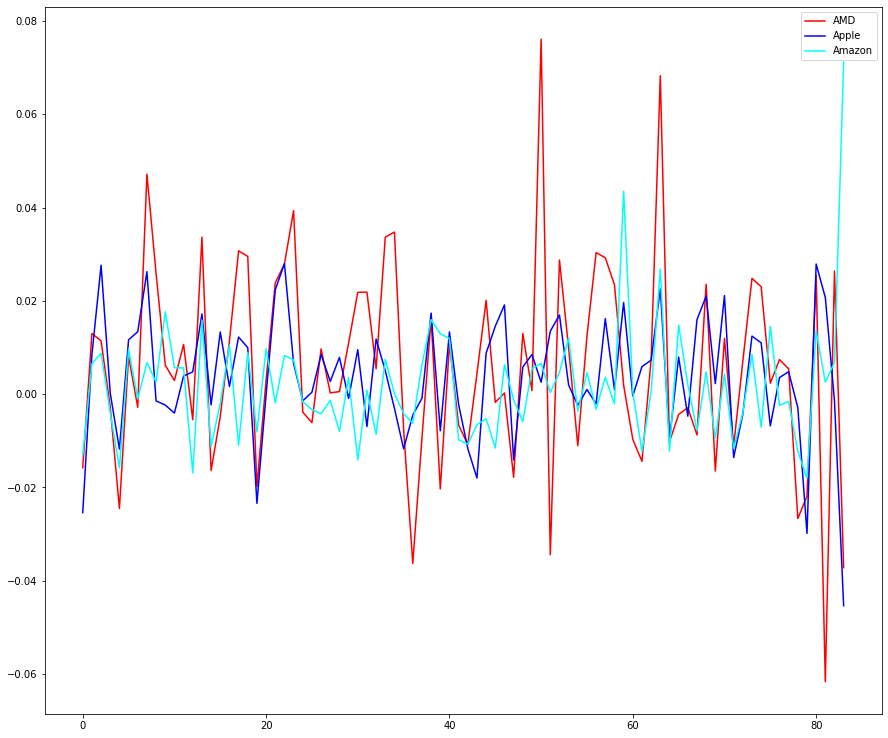

In [0]:
"""
  Grafica de rendimientos: 
"""
plt.figure(figsize=(15,13))
plt.plot(rendimiento_de_acciones['AMD'], label='AMD' , color='red')
plt.plot(rendimiento_de_acciones['Apple'], label='Apple' , color='blue')
plt.plot(rendimiento_de_acciones['Amazon'], label='Amazon' , color='cyan')
plt.legend()

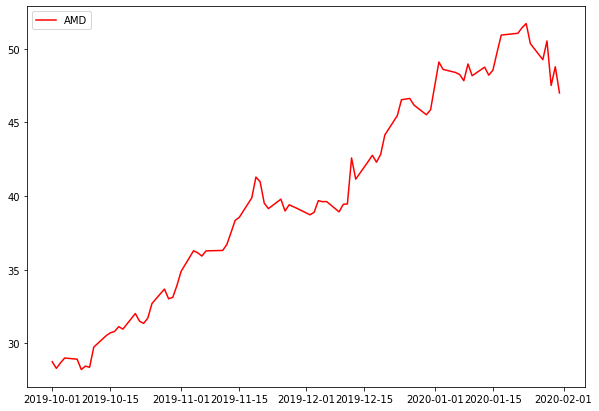

In [0]:
#GRAFICA DE LOS PRECIOS EN EL TIEMPO:
plt.figure(figsize=(10,7))
plt.plot(amd['Adj Close'], label='AMD' , color='red')
plt.legend()

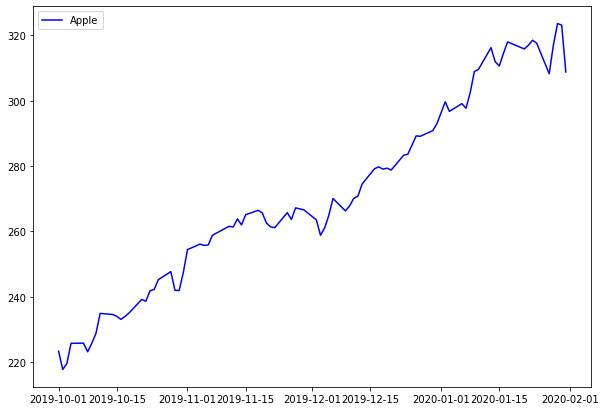

In [0]:
plt.figure(figsize=(10,7))
plt.plot(apple['Adj Close'], label='Apple' , color='blue')
plt.legend()

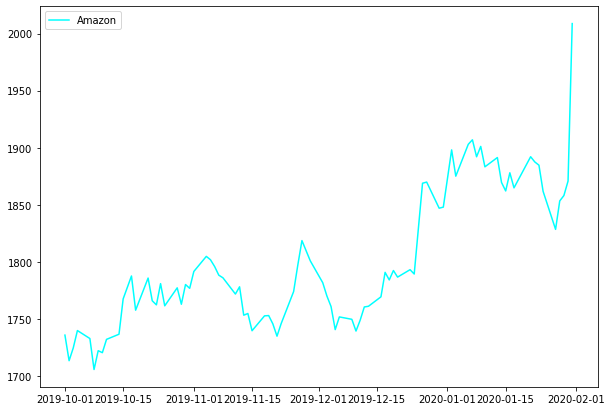

In [0]:
plt.figure(figsize=(10,7))
plt.plot(amazon['Adj Close'], label='Amazon' , color='cyan')
plt.legend()

2.- Obtenga los estadísticos de tendencia central, dispersión y forma para cada una de las distribuciones de rendimientos. Compare e interprete los resultados obtenidos.


In [0]:
"""
ESTADISTICOS DE  RENDIMIENTOS DE CADA ACCION:
"""
rendimiento_de_acciones.describe()

,AMD,Apple,Amazon
count,84.000000,84.000000,84.000000
mean,0.005847,0.003818,0.001739
std,0.022183,0.013190,0.012793
min,-0.061627,-0.045352,-0.018049
25%,-0.007838,-0.002349,-0.006302
50%,0.005445,0.003719,0.000430
75%,0.022170,0.012669,0.006939
max,0.076079,0.027986,0.071196


Text(0.5, 1.0, 'AMD')

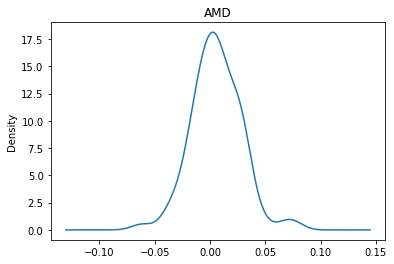

In [0]:
"""
Distribuciones de cada rendimiento: 
"""
rendimiento_de_acciones['AMD'].plot(kind='kde')
plt.title('AMD')

Text(0.5, 1.0, 'Apple')

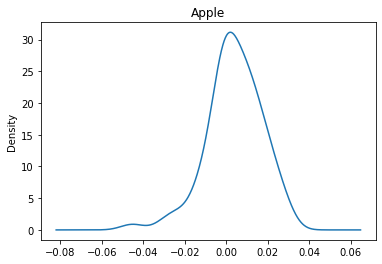

In [0]:
rendimiento_de_acciones['Apple'].plot(kind='kde')
plt.title('Apple')

Text(0.5, 1.0, 'Amazon')

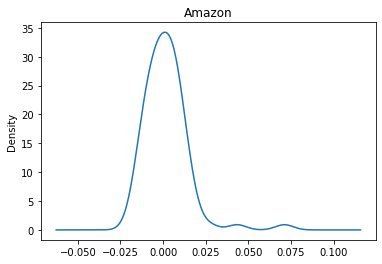

In [0]:
rendimiento_de_acciones['Amazon'].plot(kind='kde')
plt.title('Amazon')

3.- Obtenga los estadísticos de covarianza y correlación para cada par de series de rendimientos de los títulos considerados. Compare e interprete los resultados obtenidos. Para mayor facilidad despliegue sus resultados mediante la matriz de varianzas y covarianzas y la matriz de correlación.

In [0]:
matriz_cof=rendimiento_de_acciones.iloc[:].values
"""
EN LA SERIE:
  0---> AMD
  1-->Apple 
  2--> Amazon
"""

'\nEN LA SERIE:\n  0---> AMD\n  1-->Apple \n  2--> Amazon\n'

In [0]:
#Primer par de series, AMD Y Apple: 
print('Matriz de Covarianza:')
print(np.cov(matriz_cof[:,0], matriz_cof[:,1]))
print('Matriz de corelacion:')
print(np.corrcoef(matriz_cof[:,0], matriz_cof[:,1]))

Matriz de Covarianza:
[[0.0004921  0.00013086]
 [0.00013086 0.00017397]]
Matriz de corelacion:
[[1.         0.44721924]
 [0.44721924 1.        ]]


In [0]:
#Primer par de series, AMD Y Amazon: 
print('Matriz de Covarianza:')
print(np.cov(matriz_cof[:,0], matriz_cof[:,2]))
print('Matriz de corelacion:')
print(np.corrcoef(matriz_cof[:,0], matriz_cof[:,2]))

Matriz de Covarianza:
[[4.92104594e-04 5.21727803e-05]
 [5.21727803e-05 1.63670545e-04]]
Matriz de corelacion:
[[1.         0.18383576]
 [0.18383576 1.        ]]


In [0]:
#Primer par de series, Apple Y Amazon: 
print('Matriz de Covarianza:')
print(np.cov(matriz_cof[:,1], matriz_cof[:,2]))
print('Matriz de corelacion:')
print(np.corrcoef(matriz_cof[:,1], matriz_cof[:,2]))

Matriz de Covarianza:
[[1.73974280e-04 1.31288764e-05]
 [1.31288764e-05 1.63670545e-04]]
Matriz de corelacion:
[[1.         0.07780361]
 [0.07780361 1.        ]]


In [0]:
"""
 Matriz de Varianza-Covarianza de Rendimiento
"""
matriz_cof.T.dot(matriz_cof)

array([[0.04371659, 0.01273627, 0.0051847 ],
       [0.01273627, 0.01566436, 0.00164757],
       [0.0051847 , 0.00164757, 0.01383882]])

4.- Integre las bases de datos para el diseño de los siguientes portafolios  

> Portafolio | Título | Emisora/serie 
> ---|---|---
>A| 1 y 2|AMD Y Apple Inc 
>B| 2 y 3|Apple Inc Y Amazon.com, Inc.
>C| 3 y 1|Amazon.com, Inc. y AMD

Determine las participaciones óptimas en cada portafolio


7.- Presente los histogramas de las distribuciones empíricas de rendimientos:


* para cada uno de los títulos
* para cada uno de los portafolios considerados en el numeral 4
* para el portafolio considerado en el numeral 5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf17fe70f0>,
      dtype=object)

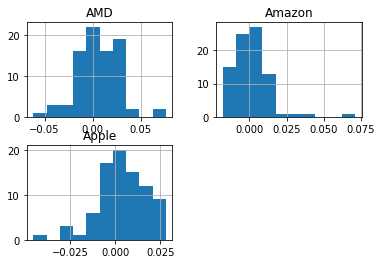

In [0]:
#Para cada uno de los titulos: 
rendimiento_de_acciones.hist()

8.- Con los datos sobre los estadísticos de media y varianza de rendimientos de los activos mencionados en el numeral anterior, obtenga las correspondientes distribuciones normales teóricas.


In [0]:
fdp_amd=stats.norm(rendimiento_de_acciones.mean()['AMD'],rendimiento_de_acciones.std()['AMD'])
fdp_apple=stats.norm(rendimiento_de_acciones.mean()['Apple'],rendimiento_de_acciones.std()['Apple'])
fdp_amazon=stats.norm(rendimiento_de_acciones.mean()['Amazon'],rendimiento_de_acciones.std()['Amazon'])
x=np.linspace(-0.2,0.2, 1000)

In [0]:
y1=fdp_amd.pdf(x)
y2=fdp_apple.pdf(x)
y3=fdp_amazon.pdf(x)

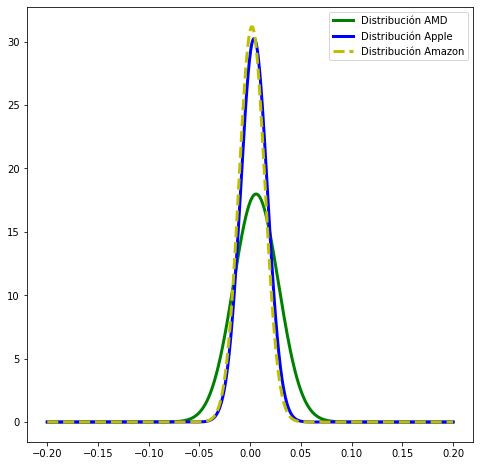

In [0]:
plt.figure(figsize=(8,8))
plt.plot(x, y1, 'g-', lw=3, label='Distribución AMD')
plt.plot(x, y2, 'b-', lw=3, label='Distribución Apple')
plt.plot(x, y3, 'y--', lw=3, label='Distribución Amazon')
plt.legend()

9.- Presente los gráficos correspondientes en los que compare la distribución empírica y la distribución teórica. ¿qué aspectos considera relevantes para que los rendimientos de los activos sigan o no una distribución normal?  


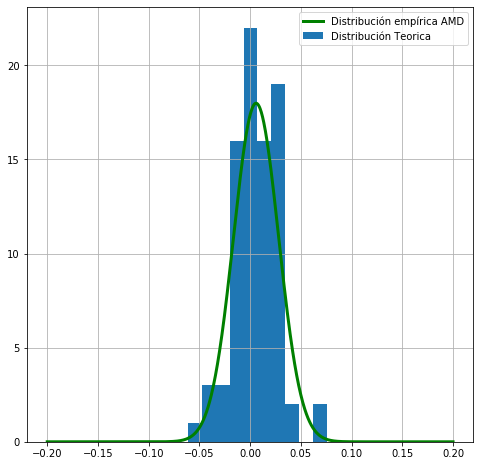

In [0]:
plt.figure(figsize=(8,8))
plt.plot(x, y1, 'g-', lw=3, label='Distribución empírica AMD')
rendimiento_de_acciones['AMD'].hist(label='Distribución Teorica')
plt.legend()

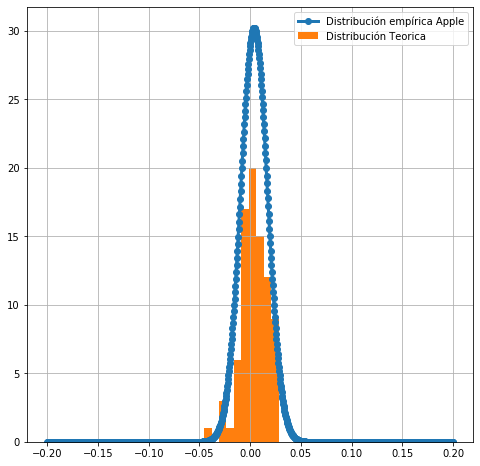

In [0]:
plt.figure(figsize=(8,8))
plt.plot(x, y2, 'o-', lw=3, label='Distribución empírica Apple')
rendimiento_de_acciones['Apple'].hist(label='Distribución Teorica')
plt.legend()

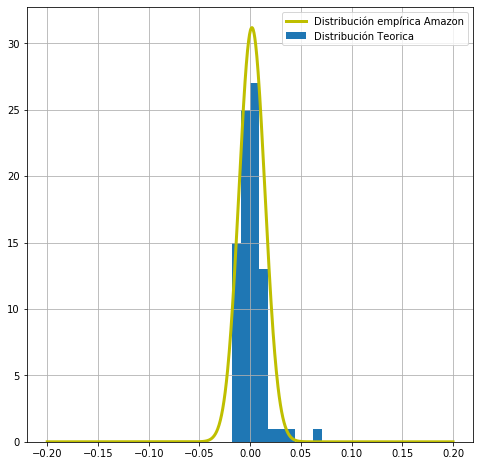

In [0]:
plt.figure(figsize=(8,8))
plt.plot(x, y3, 'y-', lw=3, label='Distribución empírica Amazon')
rendimiento_de_acciones['Amazon'].hist(label='Distribución Teorica')
plt.legend()

10.- Ajuste las series de rendimientos a la función de densidad lognormal. Compare y comente con respecto a los gráficos del numeral anterior.


In [0]:
fdpln_amd=stats.lognorm(rendimiento_de_acciones.mean()['AMD'],rendimiento_de_acciones.std()['AMD'])
fdpln_apple=stats.lognorm(rendimiento_de_acciones.mean()['Apple'],rendimiento_de_acciones.std()['Apple'])
fdpln_amazon=stats.lognorm(rendimiento_de_acciones.mean()['Amazon'],rendimiento_de_acciones.std()['Amazon'])
xx=np.linspace(0.9,1.2, 1000)

In [0]:
y11=fdpln_amd.pdf(xx)
y22=fdpln_apple.pdf(xx)
y33=fdpln_amazon.pdf(xx)

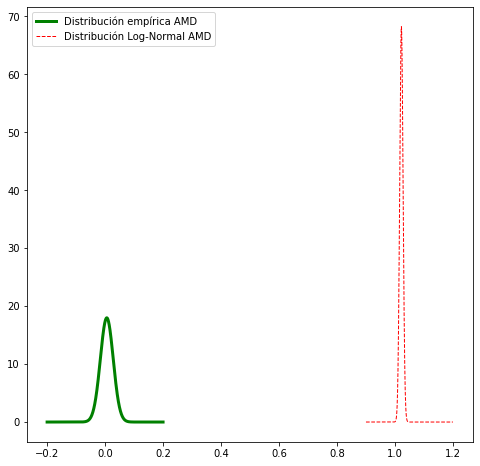

In [0]:
plt.figure(figsize=(8,8))
plt.plot(x, y1, 'g-', lw=3, label='Distribución empírica AMD')
plt.plot(xx, y11, 'r--', lw=1, label='Distribución Log-Normal AMD')
plt.legend()

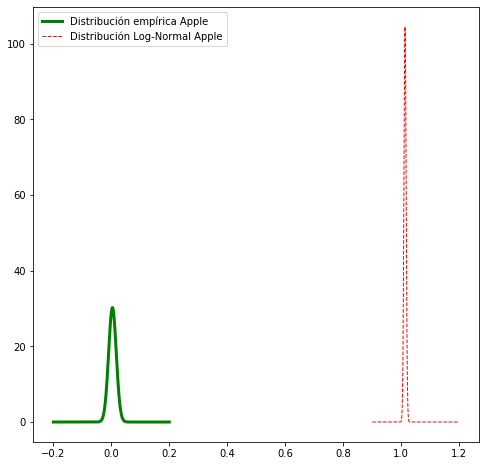

In [0]:
plt.figure(figsize=(8,8))
plt.plot(x, y2, 'g-', lw=3, label='Distribución empírica Apple')
plt.plot(xx, y22, 'r--', lw=1, label='Distribución Log-Normal Apple')
plt.legend()

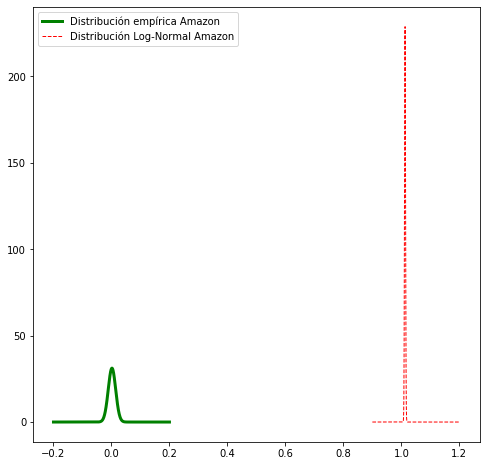

In [0]:
plt.figure(figsize=(8,8))
plt.plot(x, y3, 'g-', lw=3, label='Distribución empírica Amazon')
plt.plot(xx, y33, 'r--', lw=1, label='Distribución Log-Normal Amazon')
plt.legend()